In [1]:
import numpy as np
import cv2 as cv
import os
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

In [2]:
def generate_descriptors(path):
    descriptors = []
    for img in os.listdir(path):
        I = cv.imread(f'{path}{img}')
        I= cv.cvtColor(I,cv.COLOR_BGR2GRAY) #change to gray
        sift = cv.SIFT_create()
        [f,descriptor] = sift.detectAndCompute(I,None)
        descriptors.append(descriptor)
    return descriptors

In [4]:
def generate_histograms(path, descriptors):
    image_histogram_list = []
    for image_descriptor in descriptors:
        image_histogram = np.zeros(100)
        for feature in image_descriptor:
            feature = feature.reshape(1, 128)
            index = kmeans.predict(feature)
            image_histogram[index] += 1
        image_histogram_list.append(np.divide(image_histogram,sum(image_histogram))) #normalize
    return image_histogram_list

In [5]:
def generate_histogram_plot(image_histogram, clusters):
    plt.bar(np.arange(clusters), image_histogram)
    plt.xlabel("Visual Words")
    plt.ylabel("Count")
    plt.title("Histogram")
    plt.show()

In [6]:
def generate_labels(path):
    labels = []
    for img in os.listdir(path):
        labels.append(img[:3])
    return labels

In [7]:
train_path = './Project2_data/TrainingDataset/'
train_descriptors = generate_descriptors(train_path)
print("Starting Kmeans...")
kmeans = KMeans(n_clusters = 100, max_iter = 100, n_init = 3).fit(np.concatenate(train_descriptors))
print("Done.")

Starting Kmeans...
Done.


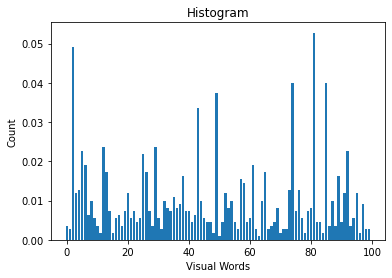

In [8]:
train_histograms = generate_histograms(train_path, train_descriptors)
generate_histogram_plot(train_histograms[2],100) #just an example

In [9]:
test_path = './Project2_data/TestingDataset/'
test_descriptors = generate_descriptors(test_path)
test_histograms = generate_histograms(test_path, test_descriptors)

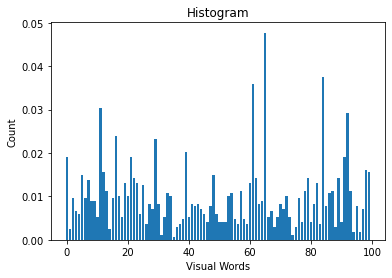

In [10]:
generate_histogram_plot(test_histograms[2],100) #just an example

In [11]:
train_labels = generate_labels(train_path)
test_labels = generate_labels(test_path)

0.7222222222222222


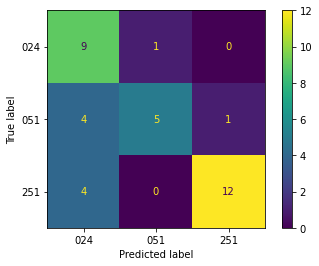

In [12]:
neigh = KNeighborsClassifier(n_neighbors=1).fit(train_histograms, train_labels)
print(accuracy_score(test_labels, neigh.predict(test_histograms)))
plot_confusion_matrix(neigh, test_histograms, test_labels)  

0.4722222222222222


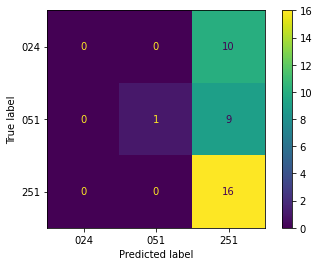

In [13]:
linearSVC = SVC(kernel="linear").fit(train_histograms, train_labels)
print(accuracy_score(test_labels, linearSVC.predict(test_histograms)))
plot_confusion_matrix(linearSVC, test_histograms, test_labels)  

0.8333333333333334


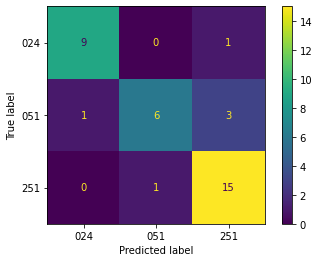

In [14]:
rbfSVC = SVC(kernel="rbf").fit(train_histograms, train_labels)
print(accuracy_score(test_labels, rbfSVC.predict(test_histograms)))
plot_confusion_matrix(rbfSVC, test_histograms, test_labels)  